##**Creating NLP Models with TensorFlow**

**_import pandas as pd_** used to import pandas modules into the Ipython environment.
The pandas module provides various functions and classes for working with data in **tabular form**.

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('jobs_in_data.csv')

This code functions to read a **_CSV_** file containing job data and save it into a DataFrame in **Python**.

1. df = ... =_This section stores the DataFrame generated by the pd.read_csv() function into a variable named **df**_
2. pd.read_csv() =_fungsi dari library Pandas yang digunakan untuk membaca file **CSV**._

In [ ]:
df.head()

,job_title,job_category,salary_currency,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,Data DevOps Engineer,Data Engineering,EUR,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,Data Architect,Data Architecture and Modeling,USD,United States,Senior,Full-time,In-person,United States,M
2,Data Architect,Data Architecture and Modeling,USD,United States,Senior,Full-time,In-person,United States,M
3,Data Scientist,Data Science and Research,USD,United States,Senior,Full-time,In-person,United States,M
4,Data Scientist,Data Science and Research,USD,United States,Senior,Full-time,In-person,United States,M


_**df.head()**_ used to display the top rows of a DataFrame. By default, _**df.head()**_ will display the top 5 rows.

In [ ]:
df.shape

(9355, 12)

In [ ]:
category = pd.get_dummies(df.company_size)
df_baru = pd.concat([df, category], axis=1)
df_baru = df_baru.drop(columns='company_size')
df_baru

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,L,M,S
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,1,0,0
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,0,1,0
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,0,1,0
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,0,1,0
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9350,2021,Data Specialist,Data Management and Strategy,USD,165000,165000,United States,Senior,Full-time,Remote,United States,1,0,0
9351,2020,Data Scientist,Data Science and Research,USD,412000,412000,United States,Senior,Full-time,Remote,United States,1,0,0
9352,2021,Principal Data Scientist,Data Science and Research,USD,151000,151000,United States,Mid-level,Full-time,Remote,United States,1,0,0
9353,2020,Data Scientist,Data Science and Research,USD,105000,105000,United States,Entry-level,Full-time,Remote,United States,0,0,1


The code performs a **one-hot encoding** process on the categorical column _"company_size"_ in a pandas DataFrame.

In [ ]:
df.head()

,job_title,job_category,salary_currency,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,Data DevOps Engineer,Data Engineering,EUR,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,Data Architect,Data Architecture and Modeling,USD,United States,Senior,Full-time,In-person,United States,M
2,Data Architect,Data Architecture and Modeling,USD,United States,Senior,Full-time,In-person,United States,M
3,Data Scientist,Data Science and Research,USD,United States,Senior,Full-time,In-person,United States,M
4,Data Scientist,Data Science and Research,USD,United States,Senior,Full-time,In-person,United States,M


_This line of code is used to separate data into two parts, namely input data and label data._

In [ ]:
jobs = df_baru['job_title'].values
label = df_baru[['M', 'L','S' ]].values

In [ ]:
from sklearn.model_selection import train_test_split
jobs_latih, jobs_test, label_latih, label_test = train_test_split(jobs, label, test_size = 0.2 )

This code is used to divide the dataset into two parts, namely:

**Training Data** (_Training Set_): Used to train machine learning models.

**Test Data** (_Test Set_): Used to evaluate the performance of the model after training.


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer         #Mengimpor kelas Tokenizer untuk proses tokenisasi
from tensorflow.keras.preprocessing.sequence import pad_sequences #Mengimpor fungsi pad_sequences untuk menyamakan panjang urutan.

tokenizer = Tokenizer(num_words=5000, oov_token='-')              #Membuat objek Tokenizer dengan batasan 5000 kata yang paling sering muncul.
                                                                  #Kata-kata di luar 5000 kata tersebut akan digantikan dengan token '- ' (oov_token).

tokenizer.fit_on_texts(jobs_latih)                                #Menganalisis teks pada dataset 'jobs_latih' untuk membangun vocabulary (kamus kata).
                                                                  #Menentukan 5000 kata paling sering dan nomor indeksnya

tokenizer.fit_on_texts(jobs_test)                                 #Menganalisis teks pada 'jobs_test' untuk menyesuaikan vocabulary.
                                                                  #Pastikan vocabulary konsisten untuk latih dan test.

sekuens_latih = tokenizer.texts_to_sequences(jobs_latih)          #Mengubah setiap teks pada 'jobs_latih' menjadi urutan angka berdasarkan indeks kata di vocabulary.
sekuens_test = tokenizer.texts_to_sequences(jobs_test)            #Mengubah teks pada 'jobs_test' menjadi urutan angka dengan cara yang sama.

padded_latih = pad_sequences(sekuens_latih)                       #Menyamakan panjang urutan pada 'sekuens_latih' dengan menambahkan nilai 0 di belakangnya.
                                                                  #Diperlukan agar model dapat menerima input dengan dimensi yang sama.

padded_test = pad_sequences(sekuens_test)                         #Menyamakan panjang urutan pada 'sekuens_test'

This code functions to convert text into a numerical representation so that it can be processed by a text-based machine learning model.

In [ ]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim = 5000, output_dim=16),     #input_dim = 5000: Menandakan jumlah kata unik yang mungkin ada dalam dataset.
                                                                    #output_dim = 16: Menentukan dimensi vektor embedding yang dihasilkan.

    tf.keras.layers.LSTM(64),                                       #Memproses urutan vektor embedding secara bertahap untuk menangkap informasi kontekstual dalam teks.

    tf.keras.layers.Dense(128, activation='relu'),                  #Melakukan klasifikasi berdasarkan informasi yang diekstraksi oleh LSTM.
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

This code is a TensorFlow model design for classifying text with 3 output classes

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, None, 16)          80000     
                                                                 
 lstm_12 (LSTM)              (None, 64)                20736     
                                                                 
 dense_36 (Dense)            (None, 128)               8320      
                                                                 
 dense_37 (Dense)            (None, 64)                8256      
                                                                 
 dense_38 (Dense)            (None, 3)                 195       
                                                                 
Total params: 117507 (459.01 KB)
Trainable params: 117507 (459.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Bagian kode tersebut digunakan untuk mengkompilasi model dan menampilkan ringkasannya.

Kompilasi model adalah proses menentukan fungsi kerugian, pengoptimal, dan metrik yang akan digunakan untuk pelatihan dan evaluasi model.

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy') > 0.90):
      print('\nakurasi telah mencapai 90%')
      self.model.stop_training = True

callbacks = myCallback()

num_epochs = 30
history = model.fit(padded_latih, label_latih, epochs=num_epochs,
                    validation_data=(padded_test, label_test), verbose=2, callbacks=[callbacks])

Epoch 1/30
234/234 - 6s - loss: 0.4018 - accuracy: 0.9017 - val_loss: 0.3558 - val_accuracy: 0.8947 - 6s/epoch - 27ms/step
Epoch 2/30
234/234 - 1s - loss: 0.3209 - accuracy: 0.9054 - val_loss: 0.3324 - val_accuracy: 0.8947 - 1s/epoch - 6ms/step
Epoch 3/30
234/234 - 1s - loss: 0.3101 - accuracy: 0.9079 - val_loss: 0.3374 - val_accuracy: 0.8952 - 1s/epoch - 6ms/step
Epoch 4/30
234/234 - 1s - loss: 0.3101 - accuracy: 0.9079 - val_loss: 0.3289 - val_accuracy: 0.8985 - 1s/epoch - 6ms/step
Epoch 5/30
234/234 - 1s - loss: 0.3066 - accuracy: 0.9097 - val_loss: 0.3400 - val_accuracy: 0.8985 - 1s/epoch - 6ms/step
Epoch 6/30
234/234 - 1s - loss: 0.3053 - accuracy: 0.9107 - val_loss: 0.3326 - val_accuracy: 0.8990 - 1s/epoch - 6ms/step
Epoch 7/30
234/234 - 1s - loss: 0.3003 - accuracy: 0.9113 - val_loss: 0.3255 - val_accuracy: 0.8985 - 1s/epoch - 5ms/step
Epoch 8/30
234/234 - 1s - loss: 0.3000 - accuracy: 0.9106 - val_loss: 0.3325 - val_accuracy: 0.8985 - 1s/epoch - 6ms/step
Epoch 9/30
234/234 - 3s

Kode tersebut menentukan sebuah callback bernama **myCallback** yang berfungsi untuk menghentikan proses training model secara otomatis ketika akurasi validasi model mencapai 90% atau lebih.

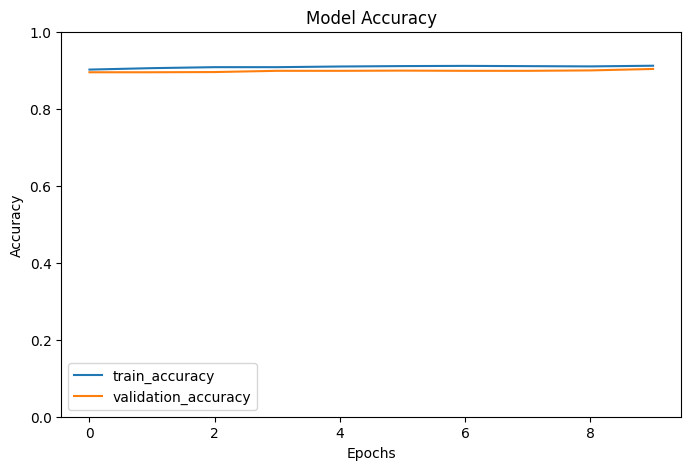

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='validation_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.ylim(ymin=0, ymax=1)
plt.show()

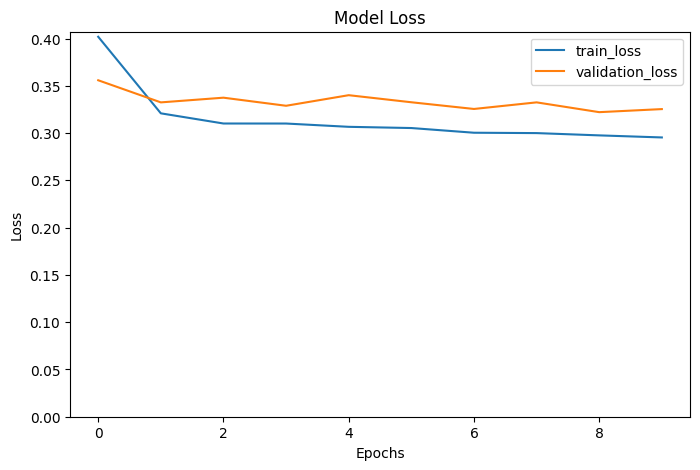

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='validation_loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.ylim(ymin=0)
plt.show()
